### Context:

The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

### Objective:

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('omw-1.4')
nltk.download('treebank')

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", 100)
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rohitkamra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohitkamra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rohitkamra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rohitkamra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/rohitkamra/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/rohitkamra/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/r

In [84]:
df = pd.read_csv('flipitnews-data.csv')

In [85]:
df.shape

(2225, 2)

In [86]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [87]:
df.duplicated().sum()

99

In [88]:
#drop duplicated articles
df.drop_duplicates(inplace=True)

In [89]:
df.shape

(2126, 2)

In [90]:
df.isna().sum()

Category    0
Article     0
dtype: int64

In [91]:
df.Category.value_counts()

Sports           504
Business         503
Politics         403
Entertainment    369
Technology       347
Name: Category, dtype: int64

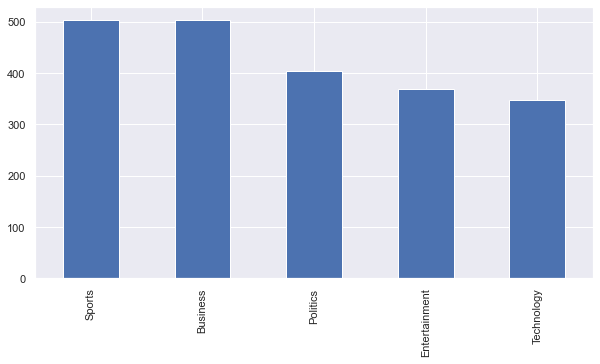

In [92]:
df.Category.value_counts().plot(kind='bar', figsize=(10,5))
plt.show()

### Observations:
1. No null values exist
2. There are 99 duplicated articles
3. Sports and Business are top contributed categories in dataset 500+. Where technology has least count 347

In [93]:
#lets see articles and understand the quality of text
articls = df[df['Category']=='Sports']['Article'].sample(5).tolist()
for ar in articls:
    print('\n', '#'*120, '\n')
    print(ar)


 ######################################################################################################################## 

aragones angered by racism fine spain coach luis aragones is furious after being fined by the spanish football federation for his comments about thierry henry.  the 66-year-old criticised his 3000 euros (£2 060) punishment even though it was far below the maximum penalty.  i am not guilty  nor do i accept being judged for actions against the image of the sport   he said.  i m not a racist and i ve never lacked sporting decorum. i ve never done that and i have medals for sporting merit.  aragones was handed the fine on tuesday after making racist remarks about henry to arsenal team-mate and spanish international jose reyes last october.  the spanish football federation at first declined to take action against aragones  but was then requested to do so by spain s anti-violence commission. the fine was far less than the expected amount of about £22 000 or even the su

### Observations:
1. There are numerical values, special chars and stop words.
2. Those information is not helpful in our problem, we need to get only contexual words/tokens to understand the article category.
3. Lets remove non-chars and stop words from each article.


In [99]:
lemmatizer = WordNetLemmatizer()
#list of all english stop words
stopwords_en = stopwords.words('english')

def process_text(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and perform lemmatization
            
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stopwords_en]
    
    #make sentence again
    new_text = " ".join(tokens)
    
    return new_text

In [100]:
df['clean_article'] = df['Article'].apply(process_text)

In [101]:
print('Before pre-processing: \n', df.loc[25, 'Article'])
print('\n\nAfter pre-processing: \n', df.loc[25, 'clean_article'])

Before pre-processing: 
 moya fights back for indian title carlos moya became the first man to successfully defend the chennai open title by beating four-times finalist paradorn srichaphan 3-6 6-4 7-6 (7/5).  the spaniard then donated his £28 000 prize money to relief efforts for the victims of the asian tsunami. the final was close throughout  with thai second seed srichaphan - the 2003 winner - closing out the first set. but moya took the second set  before bouncing back from 5-2 down in the decider to force and win a tie-break. moya confirmed afterwards:  i m donating my prize money from this tournament for the tsunami victims  hoping it makes some difference to their lives. his contribution follows pledges by four other players to donate their prize money from the tournament  which went ahead after the 26 december disaster which has so far claimed at least 150 000 lives. scrichapan said he would donate an unspecified amount for relief work in thailand  where more than 5 000 people 

In [102]:
print('Before pre-processing: \n', df.loc[125, 'Article'])
print('\n\nAfter pre-processing: \n', df.loc[125, 'clean_article'])

Before pre-processing: 
 us crude prices surge above $53 us crude prices have soared to fresh four-month highs above $53 in the us as refinery problems propelled petrol prices to an all-time high.  us light sweet crude futures jumped to $53.09 a barrel in new york before closing at $53.03. the gains tracked a surge in us gasoline futures to a record high of $1.4850 a gallon. the jump followed a fire at western refining company s refinery in texas  which shut down petrol production. a spokesman for the group was unable to say when the production unit would be back up and running.  this market simply wants to go up   citigroup global markets analyst kyle cooper told reuters news agency. ed silliere  analyst at energy merchant  added:  gasoline is up because of the refinery issues in texas  which means there will be a scramble for product in the (us) gulf coast.   elsewhere  a refinery in houston was closed due to mechanical problems  while on tuesday production at bp s texas city refiner

### Insights:
All digits, stopwords and special chars are not showing in after processing text.

In [106]:
label_en = LabelEncoder()
df['label'] = label_en.fit_transform(df['Category'])

In [107]:
df.head()

,Category,Article,clean_article,label
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1


In [109]:
#classes order
label_en.classes_

array(['Business', 'Entertainment', 'Politics', 'Sports', 'Technology'],
      dtype=object)

In [112]:
# remove unnecessary columns
df.drop(['Category', 'Article'], inplace=True, axis=1)
df.head()

,clean_article,label
0,tv future hand viewer home theatre system plas...,4
1,worldcom bos left book alone former worldcom b...,0
2,tiger wary farrell gamble leicester say rushed...,3
3,yeading face newcastle fa cup premiership side...,3
4,ocean twelve raid box office ocean twelve crim...,1


In [222]:
def get_naive_model(column, method):
    
    if method == 'cv':
        obj = CountVectorizer(ngram_range=(1,3), min_df=50)
    elif method == 'tfidf':
        obj = TfidfVectorizer(ngram_range=(1,3), min_df=50)
    else:
        return 'error'
    
    vect_df = obj.fit_transform(df[column]).toarray()
    print('shape', vect_df.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(vect_df, df['label'], test_size=0.25, random_state=4)
    print('train shape', X_train.shape, 'test shape', X_test.shape, '\n')
    #naive bayes for count vectorizer
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = naive_bayes_model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
    #confusion matrix
    labels = np.unique(df['label'])
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    return naive_bayes_model

### Naive Bayes with Count vectorizer

shape (2126, 1388)
train shape (1594, 1388) test shape (532, 1388) 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       131
           1       0.98      0.95      0.96        97
           2       0.97      0.98      0.97        94
           3       1.00      1.00      1.00       120
           4       0.93      0.98      0.95        90

    accuracy                           0.98       532
   macro avg       0.97      0.97      0.97       532
weighted avg       0.98      0.98      0.98       532



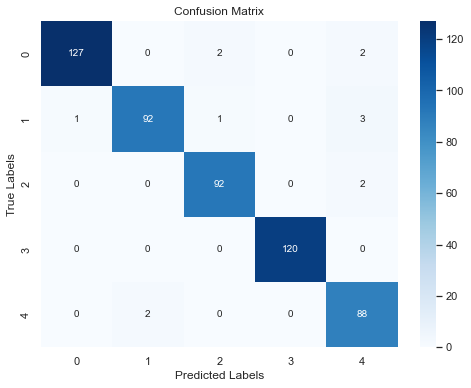

In [223]:
cv_naive_model = get_naive_model('clean_article', 'cv')

### Naive Bayes with TF-IDF

shape (2126, 1388)
train shape (1594, 1388) test shape (532, 1388) 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       131
           1       0.98      0.95      0.96        97
           2       0.97      0.98      0.97        94
           3       0.97      1.00      0.98       120
           4       0.94      0.94      0.94        90

    accuracy                           0.97       532
   macro avg       0.97      0.97      0.97       532
weighted avg       0.97      0.97      0.97       532



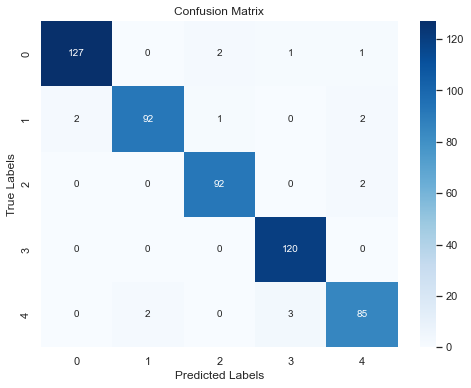

In [224]:
tf_naive_model = get_naive_model('clean_article', 'tfidf')

### Insights-

1. Count vectorizer is performing better compare to TF-IDF.
2. CV has 98% accuracy where class 3 has 100% precision and recall.

### Decision tree, Nearest neighbours, and random forest

In [226]:
def get_classification_model(column, method, model_name):
    
    if method == 'cv':
        obj = CountVectorizer(ngram_range=(1,3), min_df=50)
    elif method == 'tfidf':
        obj = TfidfVectorizer(ngram_range=(1,3), min_df=50)
    else:
        return 'error'
    
    vect_df = obj.fit_transform(df[column]).toarray()
    print('shape', vect_df.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(vect_df, df['label'], test_size=0.25, random_state=4)
    print('train shape', X_train.shape, 'test shape', X_test.shape, '\n')
  
    models = {
        'DT': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier(),
        'RF': RandomForestClassifier()
    }
    
    model = models[model_name]

    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
    #confusion matrix
    labels = np.unique(df['label'])
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # return model

### Random forest with Count vectorizer

shape (2126, 1388)
train shape (1594, 1388) test shape (532, 1388) 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       131
           1       0.98      0.97      0.97        97
           2       0.97      0.97      0.97        94
           3       0.97      1.00      0.98       120
           4       0.95      0.92      0.94        90

    accuracy                           0.97       532
   macro avg       0.97      0.96      0.97       532
weighted avg       0.97      0.97      0.97       532



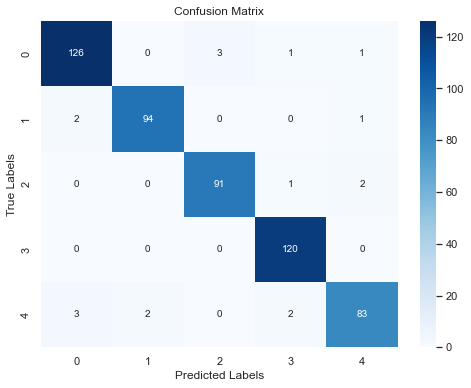

In [227]:
get_classification_model('clean_article', 'cv', 'RF')

### Random forest with TF-IDF

shape (2126, 1388)
train shape (1594, 1388) test shape (532, 1388) 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       131
           1       0.98      0.96      0.97        97
           2       0.95      0.97      0.96        94
           3       0.98      1.00      0.99       120
           4       0.97      0.92      0.94        90

    accuracy                           0.96       532
   macro avg       0.96      0.96      0.96       532
weighted avg       0.96      0.96      0.96       532



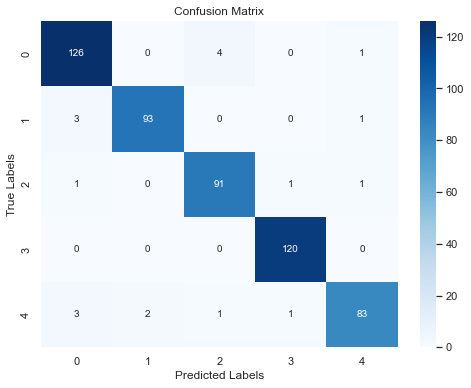

In [228]:
get_classification_model('clean_article', 'tfidf', 'RF')

### KNN with Count vectorizer

shape (2126, 1388)
train shape (1594, 1388) test shape (532, 1388) 

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       131
           1       0.82      0.78      0.80        97
           2       0.91      0.76      0.83        94
           3       0.66      1.00      0.80       120
           4       0.97      0.40      0.57        90

    accuracy                           0.78       532
   macro avg       0.83      0.76      0.76       532
weighted avg       0.82      0.78      0.77       532



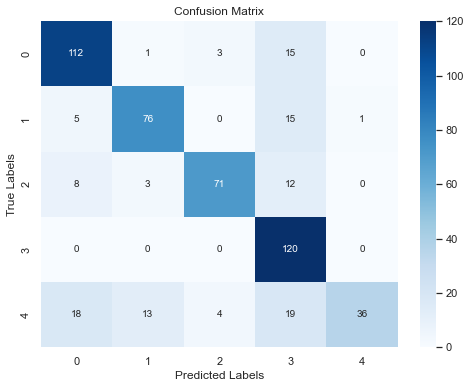

In [229]:
get_classification_model('clean_article', 'cv', 'KNN')

### KNN with TF-IDF

shape (2126, 1388)
train shape (1594, 1388) test shape (532, 1388) 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       131
           1       0.96      0.88      0.91        97
           2       0.92      0.98      0.95        94
           3       0.99      0.98      0.99       120
           4       0.88      0.93      0.90        90

    accuracy                           0.94       532
   macro avg       0.94      0.94      0.94       532
weighted avg       0.95      0.94      0.94       532



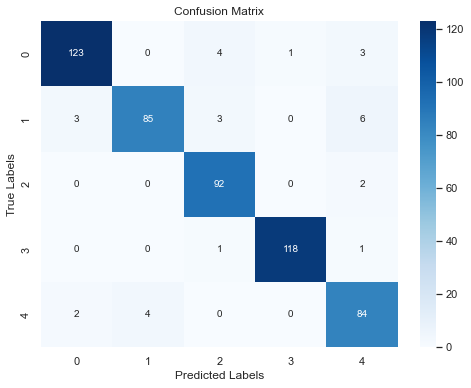

In [230]:
get_classification_model('clean_article', 'tfidf', 'KNN')

### DT with Count vectorizer

shape (2126, 1388)
train shape (1594, 1388) test shape (532, 1388) 

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       131
           1       0.83      0.86      0.84        97
           2       0.83      0.83      0.83        94
           3       0.89      0.97      0.93       120
           4       0.88      0.68      0.77        90

    accuracy                           0.85       532
   macro avg       0.85      0.84      0.84       532
weighted avg       0.85      0.85      0.85       532



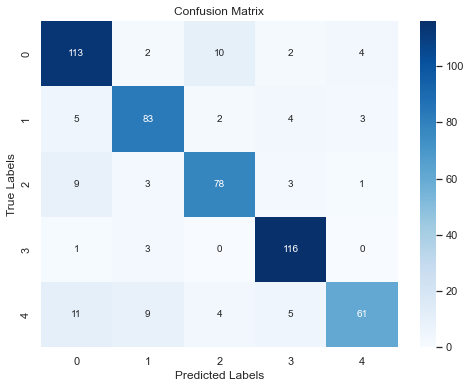

In [231]:
get_classification_model('clean_article', 'cv', 'DT')

### DT with TFIDF

shape (2126, 1388)
train shape (1594, 1388) test shape (532, 1388) 

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       131
           1       0.90      0.89      0.89        97
           2       0.81      0.88      0.85        94
           3       0.91      0.93      0.92       120
           4       0.82      0.79      0.80        90

    accuracy                           0.87       532
   macro avg       0.86      0.86      0.86       532
weighted avg       0.87      0.87      0.87       532



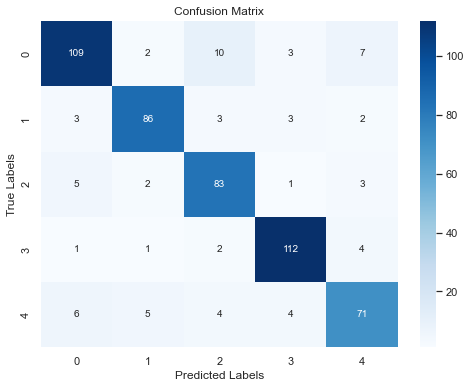

In [232]:
get_classification_model('clean_article', 'tfidf', 'DT')

### Insights-

1. Random forest is perfoming well with 97% accuracy, where PR and recall are also good for all classes.
2. KNN with count vectorizer is wrost performing model.
3. DT are doing fine only with 84% accuracy, model is confusing between 0 and 4 classes.

### Questionnaire:

- How many news articles are present in the dataset that we have?<br>
   2225 where 99 are duplicats so actually it is 2126.
   
- Most of the news articles are from _____ category.<br>
    Sports
    
- Only ___ no. of articles belong to the ‘Technology’ category.<br>
    347
    
- What are Stop Words and why should they be removed from the text data?<br>
    Stop words are common words like "the," "is," and "and" that are often removed from text data. They are typically irrelevant for analysis and can introduce noise and computational overhead, so removing them helps to focus on meaningful content, improves efficiency, and enhances feature extraction in NLP tasks.
    
- Explain the difference between Stemming and Lemmatization.<br>
  Stemming reduces words to their root or base form by removing suffixes, but it may result in non-dictionary words. Lemmatization, on the other hand, aims to determine the lemma or dictionary form of a word, considering its part of speech, resulting in valid words, but it may be computationally more expensive.
  
- Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?<br>
    Bag of words as its just count occurence of each word in corpus without doing any complex math, making it computationally faster.
    
- What’s the shape of train & test data sets after performing a 75:25 split.<br>
    train:1594, test:532
- Which of the following is found to be the best performing model. <br>
    a. Random Forest b. Nearest Neighbors c. Naive Bayes
    Random forest
- According to this particular use case, both precision and recall are equally important. (T/F)<br>
    True